#02. Neural network classification with PyTorch

Classification is a problem where there is a one or other thing(s) as options to be identified as.

## 1. Make classification data

In [1]:
import sklearn

In [2]:
from sklearn.datasets import make_circles

#make 1000 samples

n_samples = 1000

#create circles

X,y = make_circles(n_samples,
                   noise=0.03,
                   random_state = 42)

In [3]:
len(X),len(y)

(1000, 1000)

In [4]:
print(f"First 5 samples of X: {X[:5]}")
print(f"First 5 samples of y: {y[:5]}")

First 5 samples of X: [[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]
First 5 samples of y: [1 1 1 1 0]


In [5]:
#Make dataframe of the circle data

import pandas as pd
circles = pd.DataFrame({"X1": X[:,0],
                        "X2": X[:,1],
                        "label": y})
circles.head(10)

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


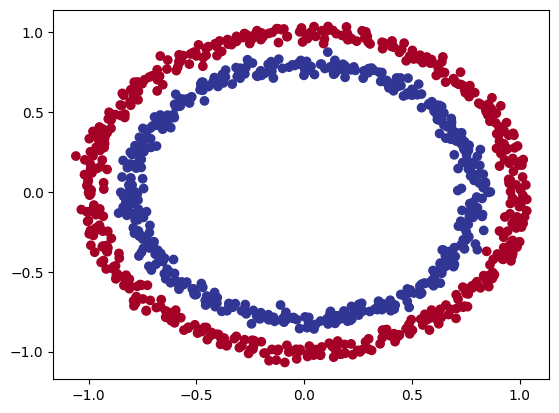

In [6]:
#visualize
import matplotlib.pyplot as plt
plt.scatter(x=X[:,0],
            y=X[:,1],
            c=y,
            cmap=plt.cm.RdYlBu);

Note: The data we are workign with is often reffered as toy dataset, a dataset that is small enough to practize but large still to do proper nn work./

### 1.1 Check input and output shapes

In [7]:
X.shape, y.shape

((1000, 2), (1000,))

In [8]:
#View the first exaple of feature and labels

X_sample = X[0]
y_sample = y[0]

print(f"Values for one sample of X : {X_sample} and the same for y: {y_sample}")
print(f"Shapes for one sample of X:{X_sample.shape} and the same for y:{y_sample.shape}")

Values for one sample of X : [0.75424625 0.23148074] and the same for y: 1
Shapes for one sample of X:(2,) and the same for y:()


### 1.2 Turn data into tensors and create train and test splits

In [9]:
import torch
torch.__version__

'2.3.0+cu121'

In [10]:
X=torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

X[:5], y[:5]

(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967]]),
 tensor([1., 1., 1., 1., 0.]))

In [11]:
#split train and test datasets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2, #20% test 80% train
                                                    random_state=42
                                                    )
len(X_train), len(X_test), len(y_train), len(y_test)

(800, 200, 800, 200)

## 2. Building a model

Let's build a model to classify our blue and red dots.

to do so
1. Set up a device agnostic codeso our code willr in on an accelerator like gpu
2. construct a model by subclassing `nn.Module`
3. Pick a loss function and optimizer
4. create a training and test loop

In [12]:
import torch
from torch import nn

#set up device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"



In [13]:
device

'cpu'

In [14]:
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


Now we have set up device agnostic code let's create a model that
1. Subclasses nn.Module
2. Create 2 linear layers `nn.Linear()`
3. Define our `forward()` method that defines the forward pass computation
4. Instantiate an instance of our mdoelc alss and send it to the target device.


In [15]:
class CircleModelV1(nn.Module):
  def __init__(self):
    super().__init__()
    #create 2 nn.Linear(0 layer)
    # self.layer_1 = nn.Linear(in_features=2, #takes in 2 and out 5
    #                        out_features=5)
    # self.layer_2 = nn.Linear(in_features=5, #takes in 5 and out 1
    #                          out_features=1)

    # or simply do the below

    self.two_linear_layers = nn.Sequential(
        nn.Linear(in_features=2, out_features=5),
        nn.Linear(in_features=5, out_features = 1)
    )

  #3. Define a forward(0 method that outlines the forwrd pass)
  def forward(self, x):
    #return self.layer_2(self.layer_1(x)) # x -> layer 1 -> layer 2 or simply do the below
    return self.two_linear_layers(x)

#4. Instantiate model class and send it to target device.

model_0 = CircleModelV1().to(device)
model_0

CircleModelV1(
  (two_linear_layers): Sequential(
    (0): Linear(in_features=2, out_features=5, bias=True)
    (1): Linear(in_features=5, out_features=1, bias=True)
  )
)

In [16]:
#lets replicate using nn.Sequential()

model_0 = nn.Sequential(
    nn.Linear(in_features=2, out_features=5),
    nn.Linear(in_features=5, out_features = 1)
).to(device)

model_0

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [17]:
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[ 0.6966, -0.3396],
                      [-0.3825,  0.5097],
                      [-0.5314,  0.4121],
                      [-0.4301,  0.1879],
                      [ 0.2399,  0.3895]])),
             ('0.bias', tensor([-0.3729,  0.6340,  0.6738, -0.4069,  0.2599])),
             ('1.weight',
              tensor([[-0.1620, -0.1699, -0.2337,  0.3496,  0.3594]])),
             ('1.bias', tensor([0.0554]))])

In [18]:
#Make predictions
with torch.inference_mode():
  untrained_preds = model_0(X_test.to(device))
print(f"Length oif predictuins : { len(untrained_preds)}, Shape: {untrained_preds.shape}")
print(f"Length oif test samples : { len(X_test)}, Shape: {X_test.shape}")
print(f"\n First 10 perdictions: \n {untrained_preds[:10]}")
print(f"First 10 labels: \n{y_test[:10]}")


Length oif predictuins : 200, Shape: torch.Size([200, 1])
Length oif test samples : 200, Shape: torch.Size([200, 2])

 First 10 perdictions: 
 tensor([[-0.1497],
        [-0.1234],
        [-0.2313],
        [-0.1266],
        [-0.2512],
        [-0.2349],
        [-0.1450],
        [-0.1712],
        [-0.2303],
        [-0.1218]])
First 10 labels: 
tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])


###2.1 Set up loss function and optimizer

Which loss function or optimizer should we use?

For examp,le for regression: MAE or MSE (mean Abs Err or Mean Sq Err)
For Classification: Binary Cross Entropy / Log Loss


The loss function measures how wrong the model's predictions are.
And for optimizers, two of the most common are SGD and Adam. However PyTorch has many built in options.

* for the loss function we are using `torch.nn.BCEWithLogitLoss()`
* for

In [19]:
loss_fn = nn.BCEWithLogitsLoss() # has sigmoid built in

optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.1)



In [20]:
#calculate accuracy - out of 100 examples what % does out model get right.
def accuracy_fn(y_true, y_pred):
  correct = torch.eq(y_true, y_pred).sum().item()
  acc = (correct / len(y_pred)) * 100
  return acc

## 3. Train Model

To train a model we need a training loop

1. Forward pass
2. Calc loss
3. Optimizer zero grad
4. Loss backward
5. optimizer step

### 3.1 Going from raw logits -> prediction probabilities to -> prediction labels

Our model outputs are going to be raw **logits**
We can convert these logits to prediction possibilities by passing them to some kind of activitation function. e.g. sigmoid for binaryu and softmax for multiclass.

Then we can convert our model's prediction prob to **prediction labels** by either rounding them or taling the `argmax()`

In [21]:

y_logits = model_0(X_test.to(device))[:5]
y_logits

tensor([[-0.1497],
        [-0.1234],
        [-0.2313],
        [-0.1266],
        [-0.2512]], grad_fn=<SliceBackward0>)

In [22]:
# use the sigmoid activation function on the logits -> to turn them into probabilities
y_pred_probs = torch.sigmoid(y_logits)
y_pred_probs

tensor([[0.4626],
        [0.4692],
        [0.4424],
        [0.4684],
        [0.4375]], grad_fn=<SigmoidBackward0>)

For our pred probability values we need to follow a range-style rounding on them:
* `y_pred_probs` >= 0.5, `y=1` (class 1)
* `y_pred_probs` < 0.5 , `y=0` (Class 0)

The threshold of 0.5 can be adjusted


In [23]:
# Find the predicted labels
y_preds = torch.round(y_pred_probs)

y_pred_labels = torch.round(torch.sigmoid(model_0(X_test.to(device))[:5]))
print(y_preds)
print( y_pred_labels)
# check for equality
print(torch.eq(y_preds, y_pred_labels))
#if above does nto work, you can squeeze
print(torch.eq(y_preds.squeeze(), y_pred_labels.squeeze(0)))


tensor([[0.],
        [0.],
        [0.],
        [0.],
        [0.]], grad_fn=<RoundBackward0>)
tensor([[0.],
        [0.],
        [0.],
        [0.],
        [0.]], grad_fn=<RoundBackward0>)
tensor([[True],
        [True],
        [True],
        [True],
        [True]])
tensor([[True, True, True, True, True],
        [True, True, True, True, True],
        [True, True, True, True, True],
        [True, True, True, True, True],
        [True, True, True, True, True]])


###3.2 Building a training and test loop

In [24]:
torch.manual_seed(42)

#set the epochs
epochs = 1000

#put data to device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

#Build train and eval loop

for epoch in range(epochs):
  #training
  model_0.train()

  #1. Forward Pass
  y_logits = model_0(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits)) # turns logits into pred probabilities to then pred labels

  # 2. calc loss and accuracy
  # loss = loss_fn(torch.sigmoid(y_logits),
  #                y_train) # this is without logits
  loss = loss_fn(y_logits,  #nn.BCEWithLogitsLoss expects raw logits as input
                 y_train
                 )

  acc = accuracy_fn(y_true = y_train,
                    y_pred=y_pred)

  #3. ZSero grad
  optimizer.zero_grad()

  #4. Loss backward
  loss.backward()

  #5. Optimizer step
  optimizer.step()

  ###Testing
  model_0.eval()
  with torch.inference_mode():
    #1. FOrward pass with test data
    test_logits = model_0(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    #2. calc ctest loss and acc
    test_loss = loss_fn(test_logits,
                        y_test)
    test_acc = accuracy_fn(y_true=y_test,
                           y_pred=test_pred)
  #Print out what's happening'
  if epoch % 10 == 0:
    print(f"Epoch: {epoch} | Loss: {loss:.5f} | Acc: {acc:.5f}% |test loss:{test_loss:.5f}, Test acc: {test_acc:.2f}%")

Epoch: 0 | Loss: 0.69799 | Acc: 50.00000% |test loss:0.69936, Test acc: 50.00%
Epoch: 10 | Loss: 0.69457 | Acc: 50.00000% |test loss:0.69681, Test acc: 47.50%
Epoch: 20 | Loss: 0.69365 | Acc: 46.87500% |test loss:0.69621, Test acc: 46.00%
Epoch: 30 | Loss: 0.69336 | Acc: 49.00000% |test loss:0.69603, Test acc: 48.00%
Epoch: 40 | Loss: 0.69324 | Acc: 49.87500% |test loss:0.69592, Test acc: 47.00%
Epoch: 50 | Loss: 0.69317 | Acc: 50.00000% |test loss:0.69584, Test acc: 47.00%
Epoch: 60 | Loss: 0.69313 | Acc: 50.62500% |test loss:0.69576, Test acc: 46.50%
Epoch: 70 | Loss: 0.69310 | Acc: 50.62500% |test loss:0.69569, Test acc: 47.00%
Epoch: 80 | Loss: 0.69307 | Acc: 50.37500% |test loss:0.69562, Test acc: 47.00%
Epoch: 90 | Loss: 0.69306 | Acc: 50.25000% |test loss:0.69556, Test acc: 46.00%
Epoch: 100 | Loss: 0.69304 | Acc: 50.62500% |test loss:0.69550, Test acc: 46.50%
Epoch: 110 | Loss: 0.69303 | Acc: 50.75000% |test loss:0.69545, Test acc: 47.50%
Epoch: 120 | Loss: 0.69302 | Acc: 51.12

## 4. Make preduictions and evaluate the model

Fromt he metric loosk like we are not learning anything.

So let's inspect it and make some predictions
`vizualize`

Helper functions avaialble at https://github.com/mrdbourke/pytorch-deep-learning/blob/main/helper_functions.py

In [25]:
import requests
from pathlib import Path

#Download helper functons if not already dwnloaded

if Path("helper_functions.py").is_file():
  print("Already exists")
else:
  print("Downloading")
  req = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(req.content)

from helper_functions import plot_predictions, plot_decision_boundary

Downloading


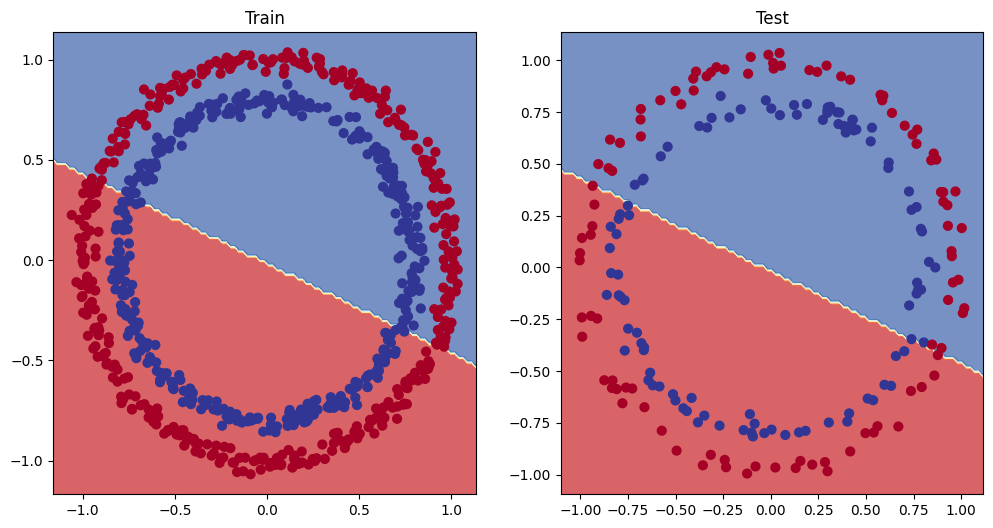

In [26]:

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_0, X_train,y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_0, X_test, y_test)

## 5. Improiving a model (from a model perspective)
* Add more layers- give the model more chances to learn about patterns and data
* Add more hidden units
* Fit for longer
* Changing the activation functions
* Change the learning rate
* Change the loss function

In [27]:
import torch
from torch import nn

class CircleModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features = 2, out_features = 10)
    self.layer_2 = nn.Linear(in_features = 10, out_features = 10)
    self.layer_3 = nn.Linear(in_features = 10, out_features = 1)

  def forward(self, x):
    # z = self.layer_1(x)
    # z = self.layer_2(z)
    # z = self.layer_3(z)
    # return zip
    return self.layer_3(self.layer_2(self.layer_1(x))) # speed ups

model_1 = CircleModelV2().to(device)
model_1

CircleModelV2(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

In [28]:
# loss_fn = nn.BCELoss() # Requires sigmoid on input
loss_fn = nn.BCEWithLogitsLoss() # Does not require sigmoid on input
optimizer = torch.optim.SGD(model_1.parameters(), lr=0.1)

In [29]:


epochs = 1000 # Train for longer

# Put data to target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):
    ### Training
    # 1. Forward pass
    y_logits = model_1(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits)) # logits -> predicition probabilities -> prediction labels

    # 2. Calculate loss/accuracy
    loss = loss_fn(y_logits, y_train)
    acc = accuracy_fn(y_true=y_train,
                      y_pred=y_pred)

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backwards
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    ### Testing
    model_1.eval()
    with torch.inference_mode():
        # 1. Forward pass
        test_logits = model_1(X_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))
        # 2. Caculate loss/accuracy
        test_loss = loss_fn(test_logits,
                            y_test)
        test_acc = accuracy_fn(y_true=y_test,
                               y_pred=test_pred)

    # Print out what's happening every 10 epochs
    if epoch % 100 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%")


Epoch: 0 | Loss: 0.69396, Accuracy: 50.88% | Test loss: 0.69261, Test acc: 51.00%
Epoch: 100 | Loss: 0.69305, Accuracy: 50.38% | Test loss: 0.69379, Test acc: 48.00%
Epoch: 200 | Loss: 0.69299, Accuracy: 51.12% | Test loss: 0.69437, Test acc: 46.00%
Epoch: 300 | Loss: 0.69298, Accuracy: 51.62% | Test loss: 0.69458, Test acc: 45.00%
Epoch: 400 | Loss: 0.69298, Accuracy: 51.12% | Test loss: 0.69465, Test acc: 46.00%
Epoch: 500 | Loss: 0.69298, Accuracy: 51.00% | Test loss: 0.69467, Test acc: 46.00%
Epoch: 600 | Loss: 0.69298, Accuracy: 51.00% | Test loss: 0.69468, Test acc: 46.00%
Epoch: 700 | Loss: 0.69298, Accuracy: 51.00% | Test loss: 0.69468, Test acc: 46.00%
Epoch: 800 | Loss: 0.69298, Accuracy: 51.00% | Test loss: 0.69468, Test acc: 46.00%
Epoch: 900 | Loss: 0.69298, Accuracy: 51.00% | Test loss: 0.69468, Test acc: 46.00%


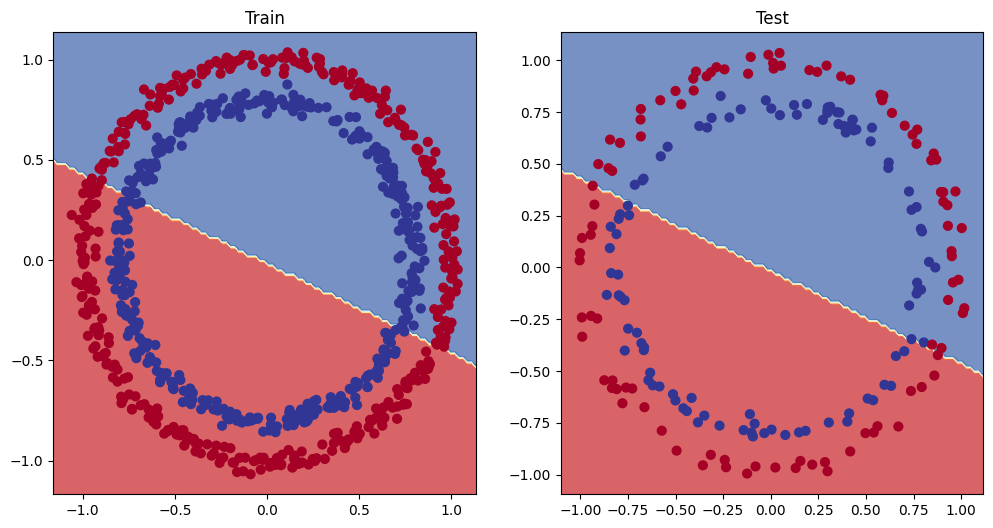

In [30]:
# Plot decision boundaries for training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_1, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_1, X_test, y_test)

### 5.1 Preparing data to fit a straight line

One way to rtouble shoot  a larger problem .

In [31]:
#same as notebook 01


weight = 0.7
bias = 0.3
start = 1
end = 3
step = 0.01

X_regression = torch.arange(start,end,step).unsqueeze(dim=1)
y_regression = weight * X_regression + bias
len(X_regression),len(y_regression)



(200, 200)

In [32]:
#check data
len(X_regression)

train_split = int(0.8*len(X_regression))
X_train_r, y_train_r = X_regression[:train_split], y_regression[:train_split]
X_test_r , y_test_r = X_regression[train_split:], y_regression[train_split:]
len(X_train_r), len(y_train_r), len(X_test_r), len(y_test_r)

(160, 160, 40, 40)

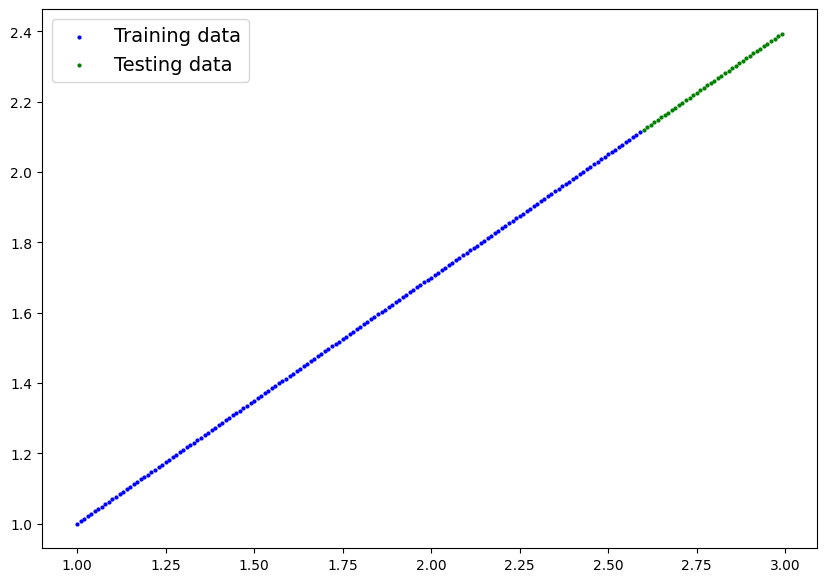

In [33]:

plot_predictions(X_train_r, y_train_r, X_test_r, y_test_r)

In [34]:
model_1

CircleModelV2(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

 ### 5.2 Adjust model `model_1` to fit the data

In [35]:
#same model as model_1 but using nn.Sequential()

model_2 = nn.Sequential(
    nn.Linear(in_features = 1, out_features = 10),
    nn.Linear(in_features = 10, out_features = 10),
    nn.Linear(in_features = 10, out_features = 1)
).to(device)

In [36]:
#Loss + opt
loss_fn  = nn.L1Loss()
optim = torch.optim.SGD(params = model_2.parameters(),
                        lr = 0.01)



In [37]:
torch.manual_seed(42)

epochs = 1000


#data on target

X_train_r, y_train_r = X_train_r.to(device), y_train_r.to(device)
X_test_r, y_test_r = X_test_r.to(device), y_test_r.to(device)

for epoch in range(epochs):
  model_2.train()
  y_pred = model_2(X_train_r)
  loss = loss_fn(y_pred, y_train_r)
  optim.zero_grad()
  loss.backward()
  optim.step()

  model_2.eval()
  with torch.inference_mode():
    test_pred = model_2(X_test_r)
    test_loss = loss_fn(test_pred, y_test_r)

  if epoch % 100 == 0:
    print(f"Epoch: {epoch} | Loss: {loss:.5f} | Test Loss: {test_loss: .5f}")

Epoch: 0 | Loss: 1.36820 | Test Loss:  1.79066
Epoch: 100 | Loss: 0.15014 | Test Loss:  0.00563
Epoch: 200 | Loss: 0.10793 | Test Loss:  0.04649
Epoch: 300 | Loss: 0.11883 | Test Loss:  0.01930
Epoch: 400 | Loss: 0.12240 | Test Loss:  0.00469
Epoch: 500 | Loss: 0.09986 | Test Loss:  0.03155
Epoch: 600 | Loss: 0.09712 | Test Loss:  0.02838
Epoch: 700 | Loss: 0.09610 | Test Loss:  0.02307
Epoch: 800 | Loss: 0.11195 | Test Loss:  0.00854
Epoch: 900 | Loss: 0.09047 | Test Loss:  0.01840


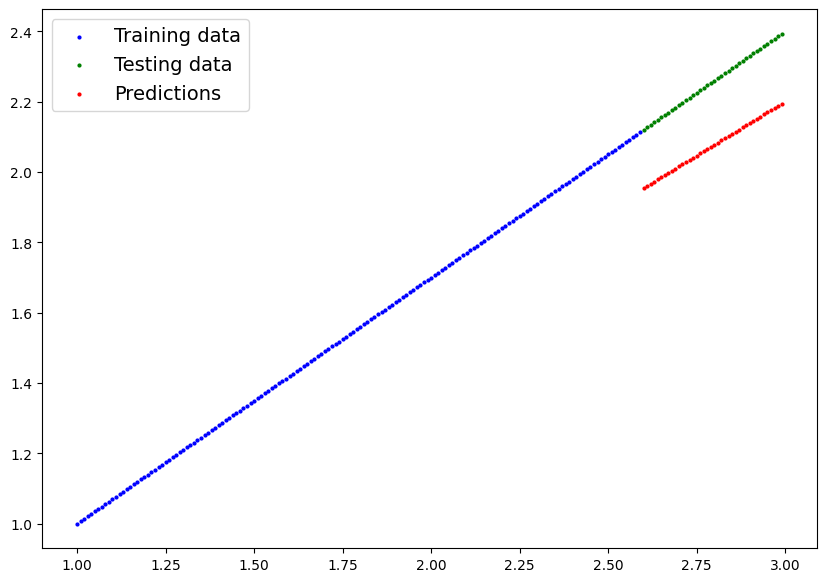

In [38]:
model_2.eval()
with torch.inference_mode():
  y_preds = model_2(X_test_r)

#Ploit
plot_predictions(train_data=X_train_r.cpu(),
                 train_labels=y_train_r.cpu(),
                 test_data = X_test_r.cpu(),
                 test_labels = y_test_r.cpu(),
                 predictions = y_preds.cpu())

## 6. The nissing piece: non-linearity

`Whart opatterns could you draw if you have a million straight and non straight lines` => we coiuld draw pretty intricate patterns cant't we?



### 6.1 Recreating non-linear data (red and blue circles)

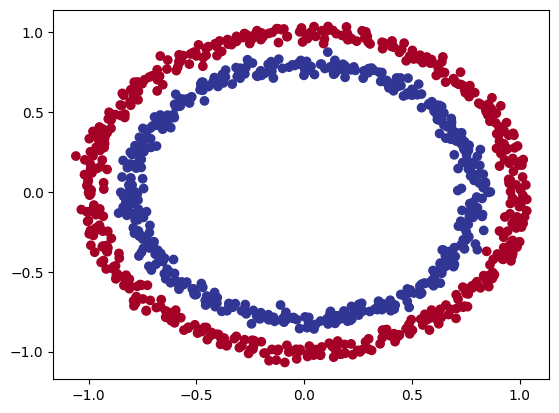

In [39]:
#make some data and plot it.
import matplotlib.pyplot as plt

from sklearn.datasets import make_circles
n_samples = 1000


X,y = make_circles(n_samples,
                   noise=0.03,
                   random_state=42)

plt.scatter(X[:,0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)

In [40]:
#convert data to tensor and traina nd split

import torch
from sklearn.model_selection import  train_test_split

X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

#split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42
                                                    )
X_train[:5], y_train[:5]

(tensor([[ 0.6579, -0.4651],
         [ 0.6319, -0.7347],
         [-1.0086, -0.1240],
         [-0.9666, -0.2256],
         [-0.1666,  0.7994]]),
 tensor([1., 0., 0., 0., 1.]))

### 6.2 Build a model with non linearity

ANNs are a large combinaton of linear and non linear activation functions.



In [41]:
# Build model with non-linear activation function
from torch import nn
class CircleModelNonLin(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features=2, out_features=10)
        self.layer_2 = nn.Linear(in_features=10, out_features=10)
        self.layer_3 = nn.Linear(in_features=10, out_features=1)
        self.relu = nn.ReLU() # <- add in ReLU activation function
        # Can also put sigmoid in the model
        # This would mean you don't need to use it on the predictions
        # self.sigmoid = nn.Sigmoid()

    def forward(self, x):
      # Intersperse the ReLU activation function between layers
       return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))

model3 = CircleModelNonLin().to(device)
print(model3)

CircleModelNonLin(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)


In [42]:
#loss and optim

loss_fn = nn.BCEWithLogitsLoss()
optim = torch.optim.SGD( model3.parameters(),
                        lr = 0.1)


In [43]:
import torch
torch.manual_seed(42)
torch.cuda.manual_seed(42)

#put all data to device
X_train , y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)


epochs = 3000
for epoch in range(epochs):
  model3.train()

  #1. forward pass
  y_logits = model3(X_train).squeeze()
  l_pred = torch.round(torch.sigmoid(y_logits)) # logits => probs => labels
  #2. loss
  loss = loss_fn(y_logits, y_train)
  acc = accuracy_fn(y_true=y_train,
                    y_pred=y_pred)
  #zero grad
  optim.zero_grad()
  #back prop
  loss.backward()
  #optim step
  optim.step()

  model3.eval()
  with torch.inference_mode():
    test_logits = model3(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))
    test_loss = loss_fn(test_logits, y_test)
    test_acc = accuracy_fn(y_true = y_test,
                           y_pred = test_pred
                           )
  #Print out whats happening
  if epoch %100 == 0:
    print(f"Epoch{epoch} | Loss: {loss: .4f} , Acc: {acc:.2f}% | Test Loss: {test_loss:.4f}, Test acc:{test_acc: .2f}")


Epoch0 | Loss:  0.6929 , Acc: 0.00% | Test Loss: 0.6932, Test acc: 50.00
Epoch100 | Loss:  0.6912 , Acc: 0.00% | Test Loss: 0.6910, Test acc: 52.50
Epoch200 | Loss:  0.6898 , Acc: 0.00% | Test Loss: 0.6894, Test acc: 55.00
Epoch300 | Loss:  0.6879 , Acc: 0.00% | Test Loss: 0.6872, Test acc: 56.00
Epoch400 | Loss:  0.6852 , Acc: 0.00% | Test Loss: 0.6841, Test acc: 56.50
Epoch500 | Loss:  0.6810 , Acc: 0.00% | Test Loss: 0.6794, Test acc: 56.50
Epoch600 | Loss:  0.6751 , Acc: 0.00% | Test Loss: 0.6729, Test acc: 56.00
Epoch700 | Loss:  0.6666 , Acc: 0.00% | Test Loss: 0.6632, Test acc: 59.00
Epoch800 | Loss:  0.6516 , Acc: 0.00% | Test Loss: 0.6476, Test acc: 67.50
Epoch900 | Loss:  0.6236 , Acc: 0.00% | Test Loss: 0.6215, Test acc: 79.00
Epoch1000 | Loss:  0.5682 , Acc: 0.00% | Test Loss: 0.5738, Test acc: 86.50
Epoch1100 | Loss:  0.4815 , Acc: 0.00% | Test Loss: 0.4993, Test acc: 90.50
Epoch1200 | Loss:  0.3706 , Acc: 0.00% | Test Loss: 0.4059, Test acc: 92.00
Epoch1300 | Loss:  0.254

### 6.4 Evaluating a model trained with non linear activation functions

In [44]:
model3.eval()
with torch.inference_mode():
  y_preds = torch.round(torch.sigmoid(model3(X_test))).squeeze()

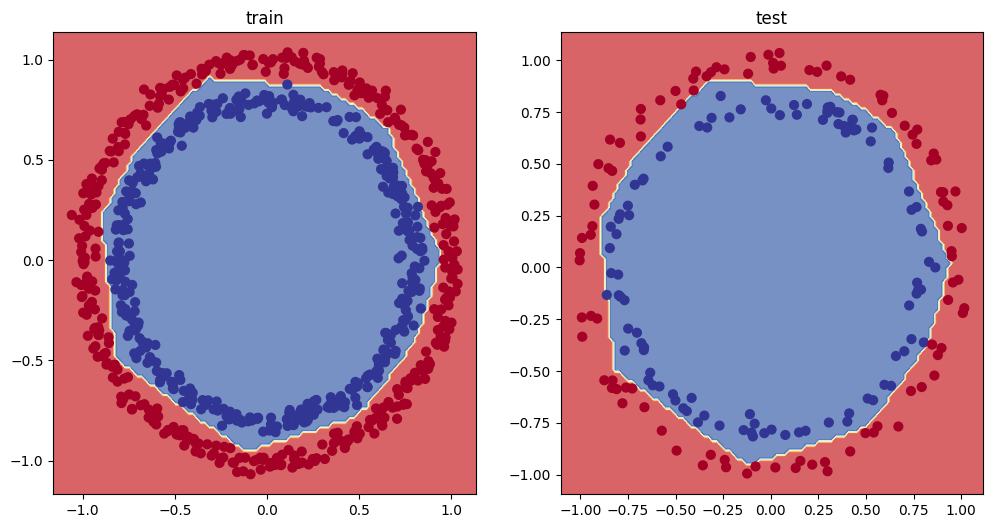

In [45]:
# plot boundary
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("train")
plot_decision_boundary(model3, X_train, y_train)
plt.subplot(1,2,2)
plt.title("test")
plot_decision_boundary(model3,X_test,y_test)

## 7. Replicating non-linear activatin functions

NN rather than us telling the model, we give it tools to discover patterns n data and patterns on its won

In [46]:
A = torch.arange(-10,10,1, dtype= torch.float)
A.dtype

torch.float32

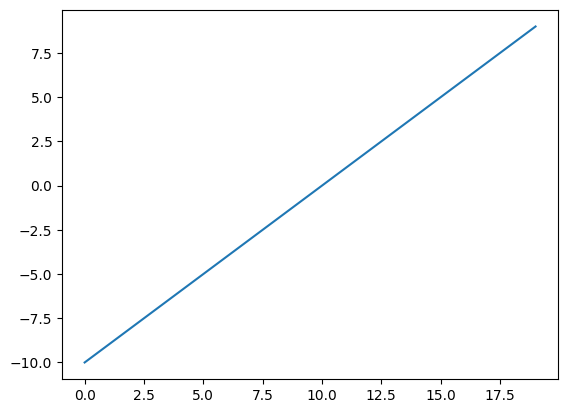

In [47]:
#visualize
plt.plot(A)

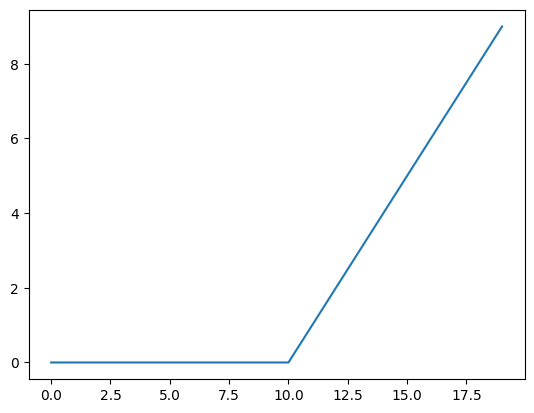

In [48]:
plt.plot(torch.relu(A))

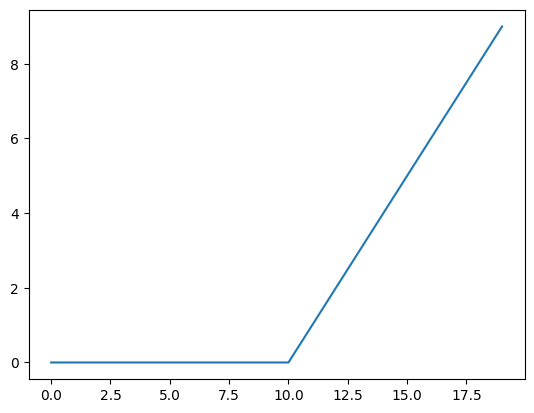

In [49]:
def relu(x):
  return torch.maximum(torch.tensor(0),x)

relu(A)
plt.plot(relu(A))

In [50]:
def sigmoid(x):
  return 1 /(1 + torch.exp(-x))

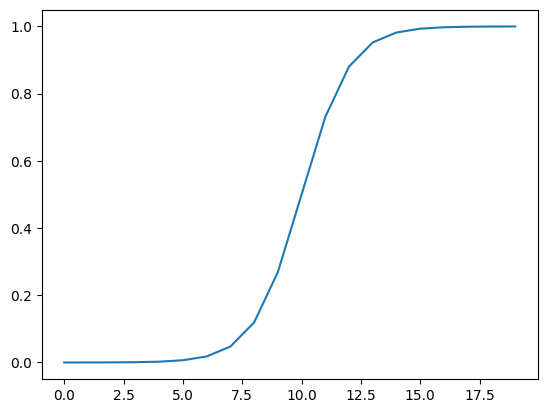

In [51]:
plt.plot(sigmoid(A))

## 8. Putting it all together with a multiclass classification

* Binary classification = one thing or the toher. (cat vs dog / spam or not spam)
* multi class = more than 2 classes

### 8.1 Creating a toy milti-class dataset

tensor([[-8.4134,  6.9352],
        [-5.7665, -6.4312],
        [-6.0421, -6.7661],
        [ 3.9508,  0.6984],
        [ 4.2505, -0.2815]]) tensor([3, 2, 2, 1, 1])


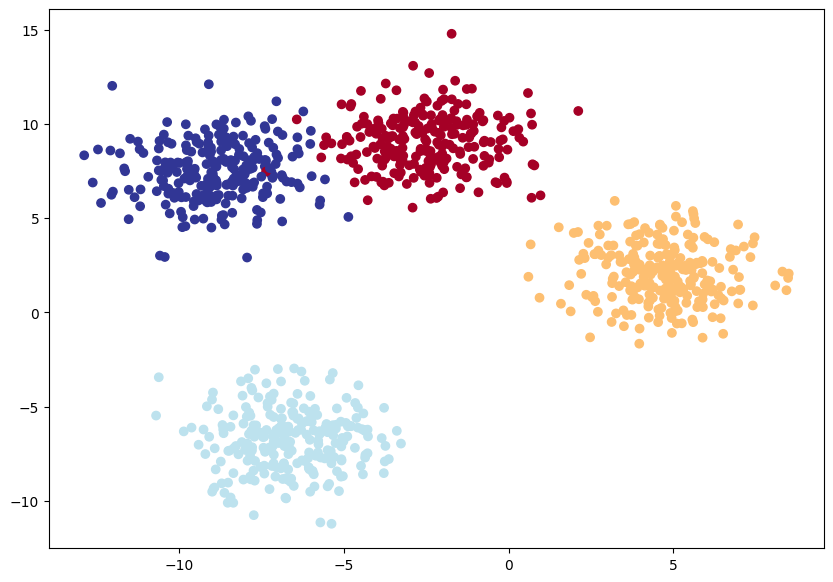

In [60]:
# Import dependencies
import torch
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

# Set the hyperparameters for data creation
NUM_CLASSES = 4
NUM_FEATURES = 2
RANDOM_SEED = 42

# 1. Create multi-class data
X_blob, y_blob = make_blobs(n_samples=1000,
    n_features=NUM_FEATURES, # X features
    centers=NUM_CLASSES, # y labels
    cluster_std=1.5, # give the clusters a little shake up (try changing this to 1.0, the default)
    random_state=RANDOM_SEED
)

# 2. Turn data into tensors
X_blob = torch.from_numpy(X_blob).type(torch.float)
y_blob = torch.from_numpy(y_blob).type(torch.LongTensor)
print(X_blob[:5], y_blob[:5])

# 3. Split into train and test sets
X_blob_train, X_blob_test, y_blob_train, y_blob_test = train_test_split(X_blob,
    y_blob,
    test_size=0.2,
    random_state=RANDOM_SEED
)

# 4. Plot data
plt.figure(figsize=(10, 7))
plt.scatter(X_blob[:, 0], X_blob[:, 1], c=y_blob, cmap=plt.cm.RdYlBu);

### 8.2 Build a multi-class classification model in PyTorch

In [53]:
#create device agnostic
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [61]:
from torch import nn

# Build model
class BlobModel(nn.Module):
    def __init__(self, input_features, output_features, hidden_units=8):
        """Initializes all required hyperparameters for a multi-class classification model.

        Args:
            input_features (int): Number of input features to the model.
            out_features (int): Number of output features of the model
              (how many classes there are).
            hidden_units (int): Number of hidden units between layers, default 8.
        """
        super().__init__()
        self.linear_layer_stack = nn.Sequential(
            nn.Linear(in_features=input_features, out_features=hidden_units),
            # nn.ReLU(), # <- does our dataset require non-linear layers? (try uncommenting and see if the results change)
            nn.Linear(in_features=hidden_units, out_features=hidden_units),
            # nn.ReLU(), # <- does our dataset require non-linear layers? (try uncommenting and see if the results change)
            nn.Linear(in_features=hidden_units, out_features=output_features), # how many classes are there?
        )

    def forward(self, x):
        return self.linear_layer_stack(x)

# Create an instance of BlobModel and send it to the target device
model_4 = BlobModel(input_features=NUM_FEATURES,
                    output_features=NUM_CLASSES,
                    hidden_units=8).to(device)
model_4

BlobModel(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): Linear(in_features=8, out_features=8, bias=True)
    (2): Linear(in_features=8, out_features=4, bias=True)
  )
)

### 8.3 Create loss function and optimizer for multi class classifier


In [62]:
# Create loss and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model_4.parameters(),
                            lr=0.1) # exercise: try changing the learning rate here and seeing what happens to the model's performance


### 8.4 Getting pred probabilites for the PyTorch model


In ourder to evaluate we need to convert the logits to probabilities and then to prediction labels

For multi class classification we need a softmax activation function


Logits(raw output) -> pred prob (softmax) -> pred labels -> argmax

In [66]:
model_4.eval()
with torch.inference_mode():
  y_logits = model_4(X_blob_test.to(device))
y_logits[:10]

tensor([[ 0.8161, -0.8846, -0.2847,  0.4252],
        [-0.9359, -2.0669,  0.9583, -2.2816],
        [-0.6742, -0.0694,  0.8067, -1.3123],
        [ 0.6858, -0.5307, -0.1840,  0.3610],
        [ 0.1430, -1.9414,  0.1816, -0.8017],
        [-1.1805, -2.3145,  1.1303, -2.6851],
        [-0.4175,  0.1534,  0.6255, -0.9003],
        [-0.1357, -1.9379,  0.3829, -1.1728],
        [-1.0798, -0.3154,  1.0950, -1.9303],
        [-0.0296, -1.9148,  0.3067, -1.0240]])

In [67]:
#convert our logits to probs
y_pred_probs = torch.softmax(y_logits, dim=1)
print(y_logits[:5])
print(y_pred_probs[:5])

tensor([[ 0.8161, -0.8846, -0.2847,  0.4252],
        [-0.9359, -2.0669,  0.9583, -2.2816],
        [-0.6742, -0.0694,  0.8067, -1.3123],
        [ 0.6858, -0.5307, -0.1840,  0.3610],
        [ 0.1430, -1.9414,  0.1816, -0.8017]])
tensor([[0.4563, 0.0833, 0.1518, 0.3087],
        [0.1215, 0.0392, 0.8077, 0.0316],
        [0.1289, 0.2361, 0.5669, 0.0681],
        [0.4102, 0.1215, 0.1719, 0.2964],
        [0.3918, 0.0487, 0.4072, 0.1523]])


In [69]:
#convert pred probs to labels
y_preds = torch.argmax(y_pred_probs, dim =1)
y_preds


tensor([0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2,
        2, 2, 2, 2, 0, 2, 2, 0, 0, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0,
        2, 2, 0, 2, 0, 0, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2,
        0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 0, 2,
        2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 2,
        0, 2, 2, 2, 2, 0, 2, 0])

### 8.5 Creating a training and testing loop for a multi -class Pytorch model

In [74]:
# Fit the model
torch.manual_seed(42)

# Set number of epochs
epochs = 100

# Put data to target device
X_blob_train, y_blob_train = X_blob_train.to(device), y_blob_train.to(device)
X_blob_test, y_blob_test = X_blob_test.to(device), y_blob_test.to(device)

for epoch in range(epochs):
    ### Training
    model_4.train()

    # 1. Forward pass
    y_logits = model_4(X_blob_train) # model outputs raw logits
    y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1) # go from logits -> prediction probabilities -> prediction labels
    # print(y_logits)
    # 2. Calculate loss and accuracy
    loss = loss_fn(y_logits, y_blob_train)
    acc = accuracy_fn(y_true=y_blob_train,
                      y_pred=y_pred)

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backwards
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    ### Testing
    model_4.eval()
    with torch.inference_mode():
      # 1. Forward pass
      test_logits = model_4(X_blob_test)
      test_pred = torch.softmax(test_logits, dim=1).argmax(dim=1)
      # 2. Calculate test loss and accuracy
      test_loss = loss_fn(test_logits, y_blob_test)
      test_acc = accuracy_fn(y_true=y_blob_test,
                             y_pred=test_pred)

    # Print out what's happening
    if epoch % 10 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Acc: {acc:.2f}% | Test Loss: {test_loss:.5f}, Test Acc: {test_acc:.2f}%")

Epoch: 0 | Loss: 0.95832, Acc: 48.75% | Test Loss: 1.13098, Test Acc: 51.00%
Epoch: 10 | Loss: 0.25116, Acc: 97.88% | Test Loss: 0.22203, Test Acc: 97.50%
Epoch: 20 | Loss: 0.10997, Acc: 99.12% | Test Loss: 0.09897, Test Acc: 98.50%
Epoch: 30 | Loss: 0.07424, Acc: 99.00% | Test Loss: 0.06577, Test Acc: 98.50%
Epoch: 40 | Loss: 0.05895, Acc: 99.00% | Test Loss: 0.05101, Test Acc: 99.00%
Epoch: 50 | Loss: 0.05068, Acc: 99.00% | Test Loss: 0.04281, Test Acc: 99.50%
Epoch: 60 | Loss: 0.04557, Acc: 99.00% | Test Loss: 0.03764, Test Acc: 99.50%
Epoch: 70 | Loss: 0.04213, Acc: 99.00% | Test Loss: 0.03410, Test Acc: 99.50%
Epoch: 80 | Loss: 0.03967, Acc: 99.00% | Test Loss: 0.03151, Test Acc: 99.50%
Epoch: 90 | Loss: 0.03784, Acc: 99.00% | Test Loss: 0.02954, Test Acc: 99.50%


 ### 8.6 Making and evaluating predictions with a PyTorch multi class model



In [76]:
model_4.eval()
with torch.inference_mode():
  y_logits = model_4(X_blob_test)



In [77]:
y_pred_probs = torch.softmax(y_logits, dim=1).argmax(dim=1)

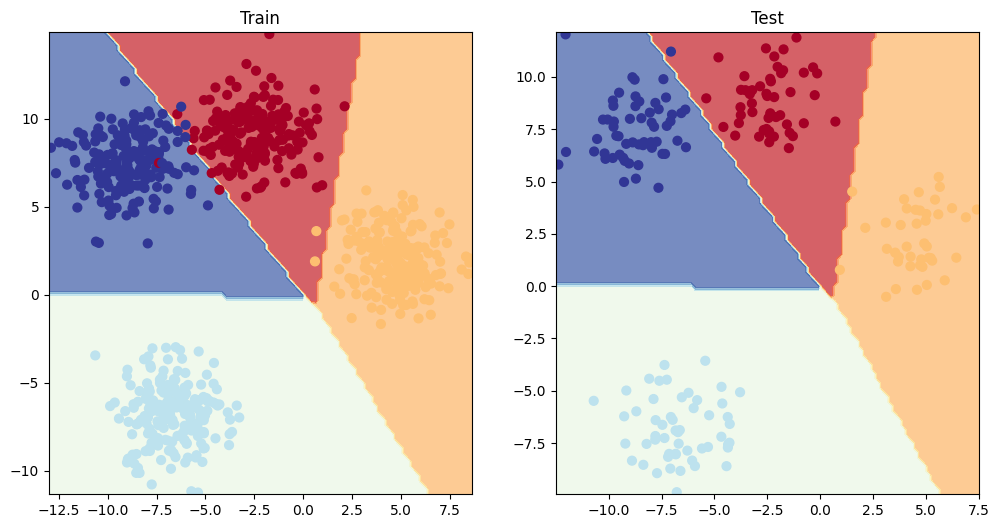

In [80]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_4, X_blob_train, y_blob_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_4, X_blob_test, y_blob_test)

### 9. A few more classification metrics:

* Accuracy: - out of 100 samples how many does our model get right `torchmetrics.Accuracy()` or `sklearn.metrics.accuracy_score()`
* Precision - High precision  = lss false positives. `torchmetris.Precision()`
* Recall - High recall leads to less false negatives - `torchmetrics.Recall()`
* F1-score - combination of precision or recall - `torchmetrics.F1_score()`
* Confusion matric
* Classification matrix

In [81]:
!pip install torchmetrics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 868.8/868.8 kB 5.0 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-m

In [85]:
from torchmetrics import Accuracy

torchmetric_accuracy = Accuracy(task='multiclass',
                                num_classes = 4).to(device)

torchmetric_accuracy(y_preds, y_blob_test)

tensor(0.2700)